# Planteamiento del Problema

El problema que abordamos en este proyecto es analizar y estimar los salarios de los científicos de datos en función de diversos factores como el nivel de experiencia, el tamaño de la empresa, el tipo de empleo y la ubicación. El objetivo es desarrollar un modelo de clasificacion que pueda predecir el rango de salario de un científico de datos dados estos factores.

## Objetivos

1. Explorar y comprender el conjunto de datos: Examinaremos la estructura y los campos del conjunto de datos, verificaremos la presencia de valores faltantes, duplicados y columnas irrelevantes, y realizaremos estadísticas descriptivas para obtener información sobre los datos.

2. Análisis exploratorio de datos: Visualizaremos los datos utilizando diferentes gráficos y diagramas para identificar patrones, tendencias y relaciones entre variables.

3. Preprocesamiento de datos: Limpiaremos los datos eliminando columnas innecesarias, asignando valores ordinales a variables categóricas y realizando codificación one-hot en algunos otros casos.

4. Desarrollo del modelo: Entrenaremos y evaluaremos diferentes modelos de aprendizaje automático para predecir el rango salarial de un científico de datos. Utilizaremos modelos de clasificacion como LogisticRegression, RandomForestClassifier y SVC.

5. Evaluación del modelo: Evaluaremos el rendimiento de los modelos y en función de su rendimiento escogeremos el modelo que mejor se adapte a los datos.

6. Implementación del modelo: Finalmente una vez que tengamos un modelo satisfactorio, lo usaremos para realizar predicciones de rangos salariales para nuevos científicos de datos en función de sus características.

Al lograr estos objetivos, buscamos desarrollar un modelo que pueda ayudar a predecir los rangos de salarios de los científicos de datos y proporcionar información valiosa tanto para los solicitantes de empleo como para los empleadores en el campo de la ciencia de datos.


## Instalación de Dependencias

Para ejecutar este proyecto, es necesario utilizar Python 3.9 o una versión posterior e instalar una serie de dependencias que facilitan el análisis de datos y la implementación de modelos de machine learning. Puedes instalar todas las bibliotecas y paquetes necesarios ejecutando la siguiente línea de código:

In [ ]:
!pip install -r requirements.txt

## Importar Librerías Necesarias

Para llevar a cabo nuestro análisis y la construcción de modelos de predicción, utilizamos diversas bibliotecas de Python especializadas en la manipulación de datos, visualización y aprendizaje automático. A continuación, detallamos las bibliotecas principales que hemos importado y su propósito en este proyecto.

- Pandas: Para la manipulación y análisis de datos.
- NumPy: Para operaciones numéricas eficientes.
- Matplotlib y Seaborn: Para la visualización de datos.
- Scikit-learn: Para la construcción y evaluación de modelos de aprendizaje automático.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier

## Cargar Datos

Comenzamos cargando el dataset sobre los salarios de los científicos de datos. Este paso es necesario para poder trabajar con los datos de dicho dataset.

In [2]:
data_path: str = 'ds_salaries.csv'
df_ds_salaries: pd.DataFrame = pd.read_csv(data_path)

# Mostramos información del dataset para hacernos una idea de los datos con los que trabajamos
df_ds_salaries.info(), df_ds_salaries.head(), df_ds_salaries.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


(None,
    Unnamed: 0  work_year experience_level employment_type  \
 0           0       2020               MI              FT   
 1           1       2020               SE              FT   
 2           2       2020               SE              FT   
 3           3       2020               MI              FT   
 4           4       2020               SE              FT   
 
                     job_title  salary salary_currency  salary_in_usd  \
 0              Data Scientist   70000             EUR          79833   
 1  Machine Learning Scientist  260000             USD         260000   
 2           Big Data Engineer   85000             GBP         109024   
 3        Product Data Analyst   20000             USD          20000   
 4   Machine Learning Engineer  150000             USD         150000   
 
   employee_residence  remote_ratio company_location company_size  
 0                 DE             0               DE            L  
 1                 JP             0        

## Análisis de los Datos

En esta sección, realizamos un análisis exhaustivo para identificar patrones, tendencias y relaciones entre las variables y el salario. Esto nos permite tener una comprensión profunda del dataset y tomar decisiones informadas para el preprocesamiento y modelado.

In [3]:
# Comprobamos si hay valores faltantes en el conjunto de datos
missing_values: pd.Series = df_ds_salaries.isnull().sum()

# Comprobamos si hay valores duplicados en el conjunto de datos
duplicates: int = df_ds_salaries.duplicated().sum()

# Comprobamos valores únicos por columna (útil para detectar posibles valores irrelevantes o inconsistencias)
unique_values: dict[str, int] = {col: df_ds_salaries[col].nunique() for col in df_ds_salaries.columns}

# Resultados
missing_values, duplicates, unique_values

(Unnamed: 0            0
 work_year             0
 experience_level      0
 employment_type       0
 job_title             0
 salary                0
 salary_currency       0
 salary_in_usd         0
 employee_residence    0
 remote_ratio          0
 company_location      0
 company_size          0
 dtype: int64,
 np.int64(0),
 {'Unnamed: 0': 607,
  'work_year': 3,
  'experience_level': 4,
  'employment_type': 4,
  'job_title': 50,
  'salary': 272,
  'salary_currency': 17,
  'salary_in_usd': 369,
  'employee_residence': 57,
  'remote_ratio': 3,
  'company_location': 50,
  'company_size': 3})

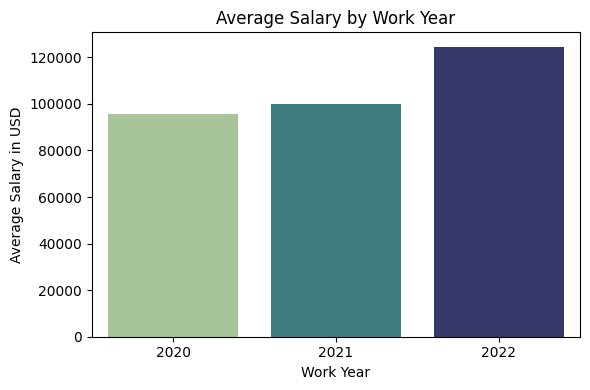

In [4]:
# Calculamos el salario promedio por año de trabajo
mean_salaries_by_year: pd.Series = df_ds_salaries.groupby('work_year')['salary_in_usd'].mean().sort_values()

# Lo visualizamos en un gráfico de barras
plt.figure(figsize=(6, 4))
sns.barplot(
    x=mean_salaries_by_year.index,
    y=mean_salaries_by_year.values,
    hue=mean_salaries_by_year.index,
    palette='crest',
    legend=False
)
plt.xlabel('Work Year')
plt.ylabel('Average Salary in USD')
plt.title('Average Salary by Work Year')
plt.tight_layout()
plt.show()

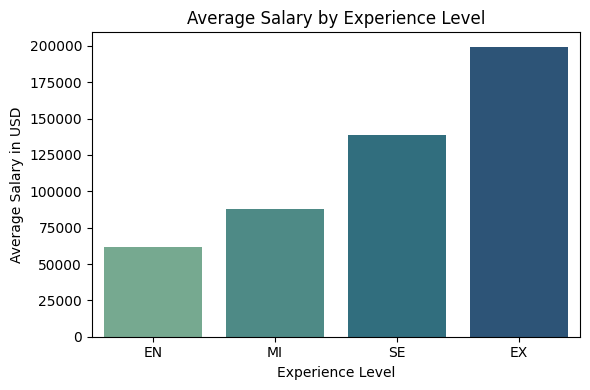

In [5]:
# Calculamos el salario promedio por nivel de experiencia
mean_salaries_by_experience: pd.Series = df_ds_salaries.groupby('experience_level')['salary_in_usd'].mean().sort_values()

# Lo visualizamos en un gráfico de barras
plt.figure(figsize=(6, 4))
sns.barplot(
    x=mean_salaries_by_experience.index,
    y=mean_salaries_by_experience.values,
    hue=mean_salaries_by_experience.index,
    palette='crest',
    legend=False
)
plt.xlabel('Experience Level')
plt.ylabel('Average Salary in USD')
plt.title('Average Salary by Experience Level')
plt.tight_layout()
plt.show()

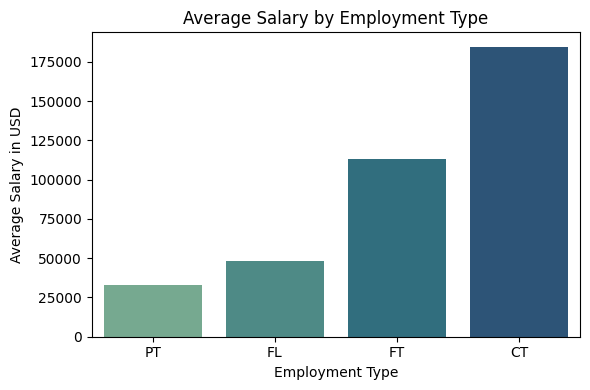

In [6]:
# Calculamos el salario promedio por tipo de empleo
mean_salaries_by_employment: pd.Series = df_ds_salaries.groupby('employment_type')['salary_in_usd'].mean().sort_values()

# Lo visualizamos en un gráfico de barras
plt.figure(figsize=(6, 4))
sns.barplot(
    x=mean_salaries_by_employment.index,
    y=mean_salaries_by_employment.values,
    hue=mean_salaries_by_employment.index,
    palette='crest',
    legend=False
)
plt.xlabel('Employment Type')
plt.ylabel('Average Salary in USD')
plt.title('Average Salary by Employment Type')
plt.tight_layout()
plt.show()

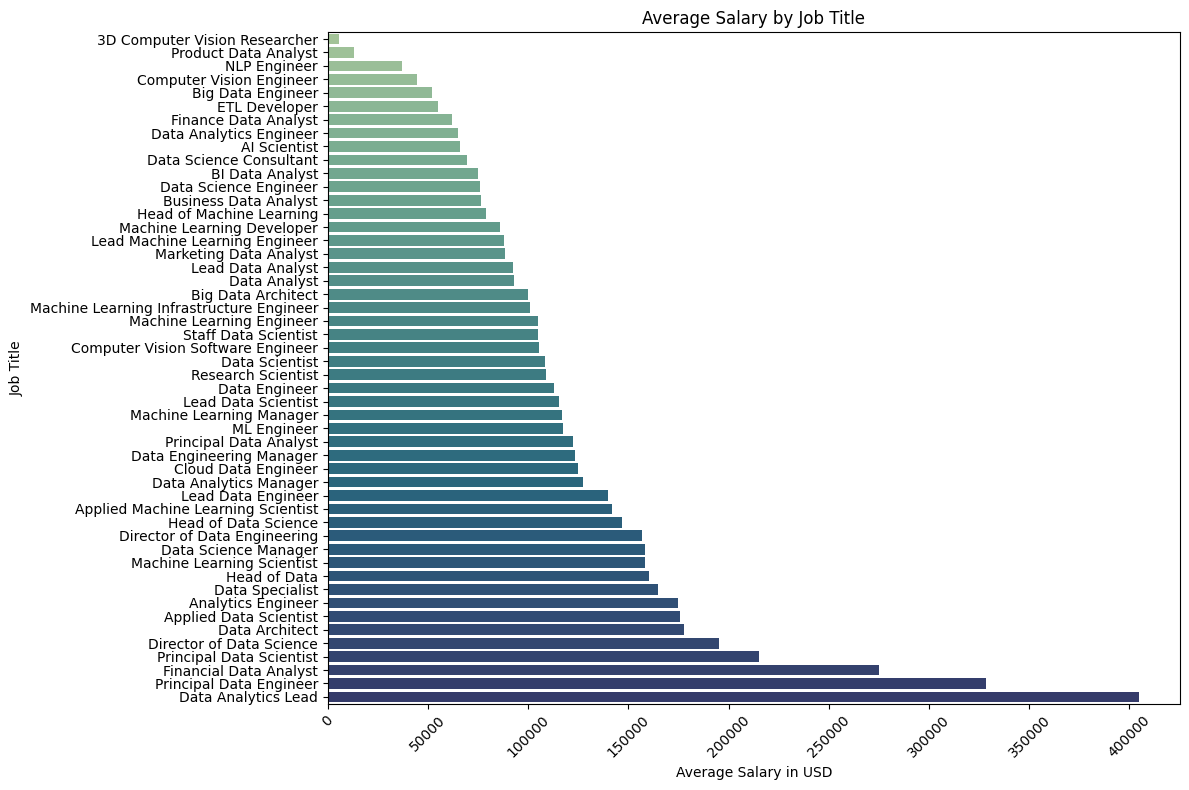

In [7]:
# Calculamos el salario promedio por título de trabajo
mean_salaries_by_title: pd.Series = df_ds_salaries.groupby('job_title')['salary_in_usd'].mean().sort_values()

# Lo visualizamos en un gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(
    x=mean_salaries_by_title.values,
    y=mean_salaries_by_title.index,
    hue=mean_salaries_by_title.index,
    palette='crest',
    legend=False
)
plt.xlabel('Average Salary in USD')
plt.ylabel('Job Title')
plt.title('Average Salary by Job Title')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

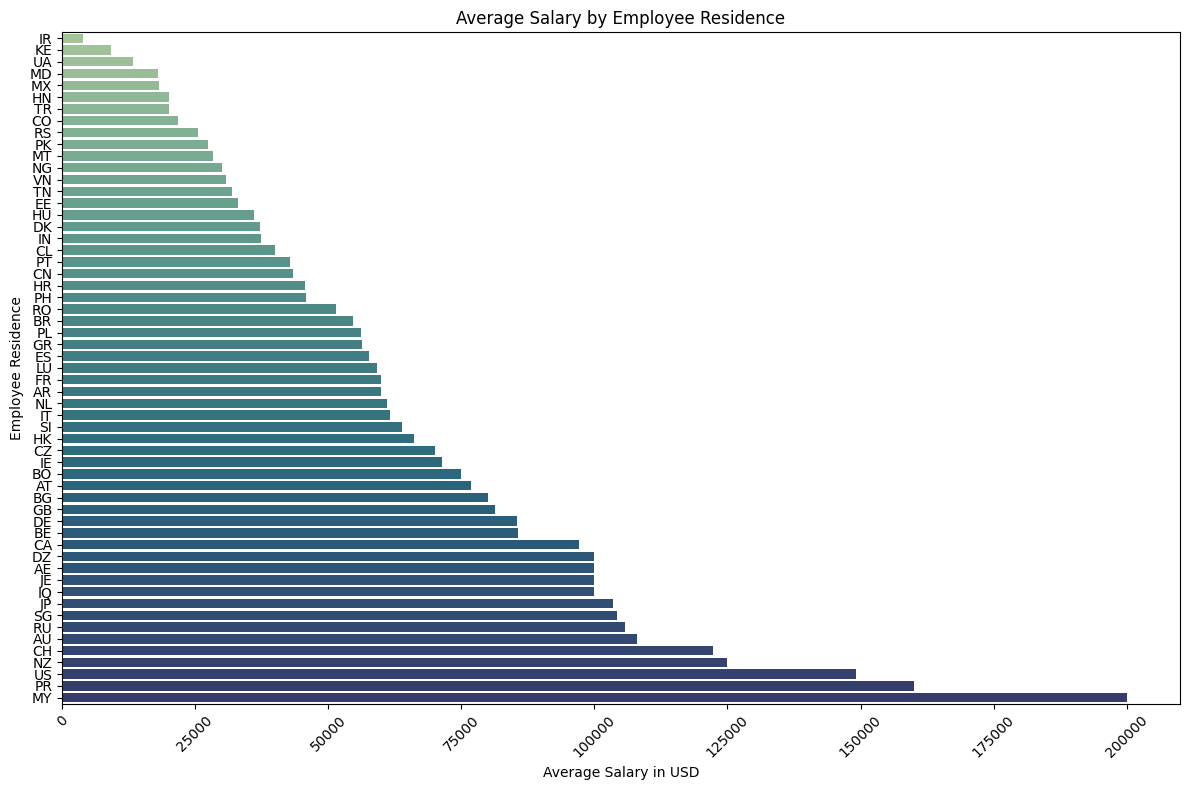

In [8]:
# Calculamos el salario promedio por residencia del empleado
mean_salaries_by_residence: pd.Series = df_ds_salaries.groupby('employee_residence')['salary_in_usd'].mean().sort_values()

# Lo visualizamos en un gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(
    x=mean_salaries_by_residence.values,
    y=mean_salaries_by_residence.index,
    hue=mean_salaries_by_residence.index,
    palette='crest',
    legend=False
)
plt.xlabel('Average Salary in USD')
plt.ylabel('Employee Residence')
plt.title('Average Salary by Employee Residence')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

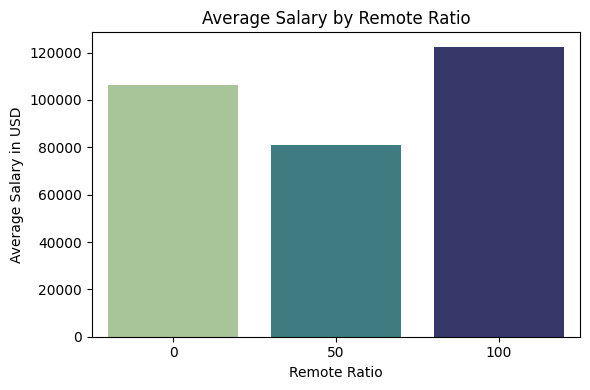

In [9]:
# Calculamos el salario promedio por porcentaje de trabajo remoto
mean_salaries_by_remote_ratio: pd.Series = df_ds_salaries.groupby('remote_ratio')['salary_in_usd'].mean()

# Lo visualizamos en un gráfico de barras
plt.figure(figsize=(6, 4))
sns.barplot(
    x=mean_salaries_by_remote_ratio.index,
    y=mean_salaries_by_remote_ratio.values,
    hue=mean_salaries_by_remote_ratio.index,
    palette='crest',
    legend=False
)
plt.xlabel('Remote Ratio')
plt.ylabel('Average Salary in USD')
plt.title('Average Salary by Remote Ratio')
plt.tight_layout()
plt.show()

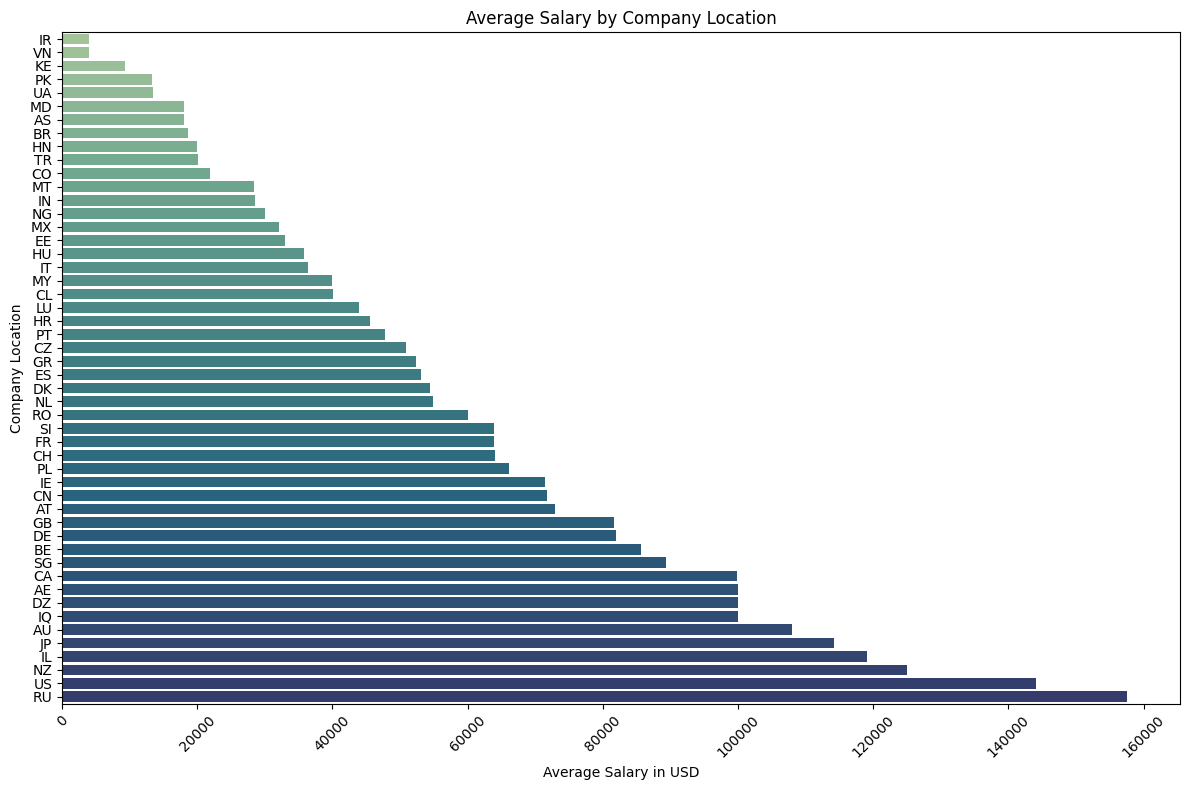

In [10]:
# Calculamos el salario promedio por ubicación de la compañía
mean_salaries_by_company_location: pd.Series = df_ds_salaries.groupby('company_location')['salary_in_usd'].mean().sort_values()

# Lo visualizamos en un gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(
    x=mean_salaries_by_company_location.values,
    y=mean_salaries_by_company_location.index,
    hue=mean_salaries_by_company_location.index,
    palette='crest',
    legend=False
)
plt.xlabel('Average Salary in USD')
plt.ylabel('Company Location')
plt.title('Average Salary by Company Location')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

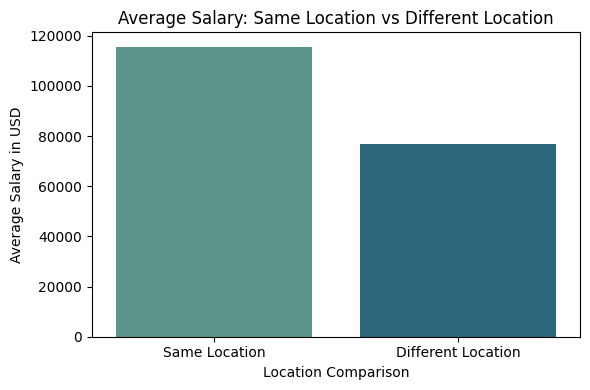

In [11]:
# Filtramos por salarios en la misma ubicación y salarios en ubicaciones diferentes
same_location_salaries: pd.Series = df_ds_salaries[
    (df_ds_salaries['company_location'] == df_ds_salaries['employee_residence'])
]['salary_in_usd']
different_location_salaries: pd.Series = df_ds_salaries[
    (df_ds_salaries['company_location'] != df_ds_salaries['employee_residence'])
]['salary_in_usd']

# Calculamos el salario promedio en la misma ubicación y en ubicaciones diferentes
mean_same_location_salary: float = same_location_salaries.mean()
mean_different_location_salary: float = different_location_salaries.mean()

# Creamos un DataFrame con los resultados
mean_salaries_by_location: pd.DataFrame = pd.DataFrame({
    'location_comparison': ['Same Location', 'Different Location'],
    'avg_salary_in_usd': [mean_same_location_salary, mean_different_location_salary]
})

# Visualizar los resultados en un gráfico de barras
plt.figure(figsize=(6, 4))
sns.barplot(
    x=mean_salaries_by_location['location_comparison'],
    y=mean_salaries_by_location['avg_salary_in_usd'],
    hue=mean_salaries_by_location['location_comparison'],
    palette='crest',
    legend=False
)
plt.xlabel('Location Comparison')
plt.ylabel('Average Salary in USD')
plt.title('Average Salary: Same Location vs Different Location')
plt.tight_layout()
plt.show()

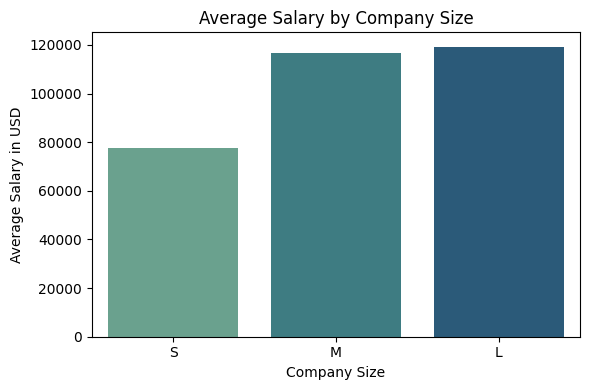

In [12]:
# Calculamos el salario promedio por tamaño de la compañía
mean_salaries_by_company_size: pd.Series = df_ds_salaries.groupby('company_size')['salary_in_usd'].mean().sort_values()

# Lo visualizamos en un gráfico de barras
plt.figure(figsize=(6, 4))
sns.barplot(
    x=mean_salaries_by_company_size.index,
    y=mean_salaries_by_company_size.values,
    hue=mean_salaries_by_company_size.index,
    palette='crest',
    legend=False
)
plt.xlabel('Company Size')
plt.ylabel('Average Salary in USD')
plt.title('Average Salary by Company Size')
plt.tight_layout()
plt.show()

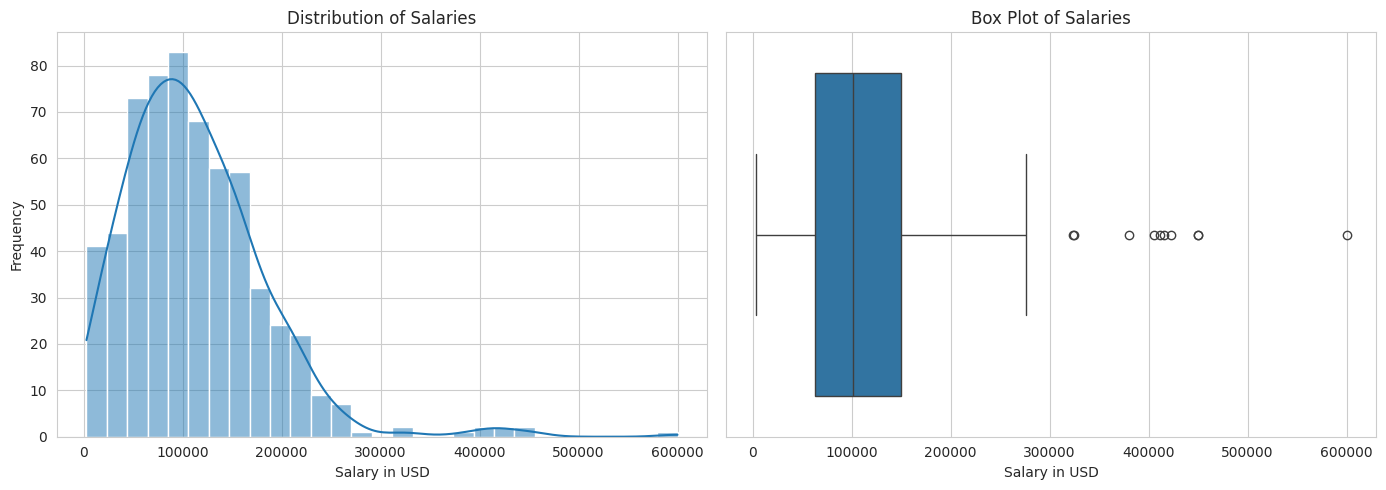

count       607.000000
mean     112297.869852
std       70957.259411
min        2859.000000
25%       62726.000000
50%      101570.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

In [13]:
# Visualizamos la distribución de los salarios mediante un histograma y un box plot

# Configuración de estilos de gráficos
sns.set_style('whitegrid')

# Creación de figuras para histograma y box plot
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Histograma de salarios
sns.histplot(df_ds_salaries['salary_in_usd'], kde=True, ax=ax[0])
ax[0].set_title('Distribution of Salaries')
ax[0].set_xlabel('Salary in USD')
ax[0].set_ylabel('Frequency')

# Box plot de salarios
sns.boxplot(x=df_ds_salaries['salary_in_usd'], ax=ax[1])
ax[1].set_title('Box Plot of Salaries')
ax[1].set_xlabel('Salary in USD')

plt.tight_layout()
plt.show()

# Imprimimos también un resumen estadístico de los salarios
df_ds_salaries['salary_in_usd'].describe()

In [14]:
# Obtenemos los valores únicos de las variables categóricas
experience_levels: np.ndarray = df_ds_salaries['experience_level'].unique()
company_sizes: np.ndarray = df_ds_salaries['company_size'].unique()
employment_types: np.ndarray = df_ds_salaries['employment_type'].unique()
work_years: np.ndarray = df_ds_salaries['work_year'].unique()

experience_levels, company_sizes, employment_types, work_years

(array(['MI', 'SE', 'EN', 'EX'], dtype=object),
 array(['L', 'S', 'M'], dtype=object),
 array(['FT', 'CT', 'PT', 'FL'], dtype=object),
 array([2020, 2021, 2022]))

## Preprocesamiento de los Datos

El preprocesamiento de los datos es una etapa crucial para preparar el dataset antes de construir los modelos predictivos. En esta sección, limpiamos y transformamos los datos eliminando columnas innecesarias, asignando valores ordinales a variables categóricas y aplicando técnicas como la codificación one-hot. Estos pasos aseguran que los datos estén en el formato adecuado para el análisis y la modelización.

In [15]:
# Eliminaremos la la columna 'Unnamed: 0' que es innecesaria
# Tambien eliminaremos las columnas 'salary' y 'salary_currency' ya que usaremos 'salary_in_usd' como variable objetivo
df_ds_salaries_clean: pd.DataFrame = df_ds_salaries.drop(columns=['Unnamed: 0', 'salary', 'salary_currency'])

# Mapeamos la experiencia laboral a valores ordinales
experience_level_map: dict[str, int] = {'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3}
df_ds_salaries_clean['experience_level'] = df_ds_salaries_clean['experience_level'].map(experience_level_map)

# Mapeamos el tamaño de la compañía a valores ordinales
company_size_map: dict[str, int] = {'S': 0, 'M': 1, 'L': 2}
df_ds_salaries_clean['company_size'] = df_ds_salaries_clean['company_size'].map(company_size_map)

# Mapeamos el tipo de empleo a valores ordinales
employment_type_map: dict[str, int] = {'PT': 0, 'FL': 1, 'FT': 2, 'CT': 3}
df_ds_salaries_clean['employment_type'] = df_ds_salaries_clean['employment_type'].map(employment_type_map)

# Mapeamos el año de trabajo a valores ordinales para simplificar el procesamiento de los datos
df_ds_salaries_clean['work_year'] = df_ds_salaries_clean['work_year'].apply(lambda x: x - 2020)

# Añadimos una columna para indicar si el empleado reside en la misma ubicación que la compañía
df_ds_salaries_clean['same_location'] = (df_ds_salaries_clean['employee_residence'] == df_ds_salaries_clean['company_location']).astype(int)

# Codificamos one-hot para las columnas categóricas restantes
categorical_columns: list[str] = ['employee_residence', 'company_location']
df_ds_salaries_clean: pd.DataFrame = pd.get_dummies(df_ds_salaries_clean, columns=categorical_columns, drop_first=True)

# Inicializamos CountVectorizer para hacer one-hot encoding a nivel de palabra sin tener en cuenta las stopwords
vectorizer: CountVectorizer = CountVectorizer(binary=True, stop_words='english')

# Ajustamos el vectorizer a los 'job_titles' y transformamos los datos
job_title_features: sp.sparse.csr_matrix = vectorizer.fit_transform(df_ds_salaries['job_title'])

# Comprobamos que el vectorizer funciona correctamente
new_job_title: str = "Head of Machine Learning and Data Science Centre"
new_job_title_features: sp.sparse.csr_matrix = vectorizer.transform([new_job_title])
print("Feature names from the example job title:", vectorizer.get_feature_names_out()[new_job_title_features.indices])

# Obtenemos los nombres de las características (palabras) del vectorizer y creamos un DataFrame con los datos transformados
feature_names_out: np.ndarray = vectorizer.get_feature_names_out()
df_job_title: pd.DataFrame = pd.DataFrame(job_title_features.toarray(), columns=feature_names_out, dtype=int).add_prefix("job_title_")

# Concatenamos el DataFrame de los datos limpios con el DataFrame de los datos transformados y eliminamos la columna 'job_title'
df_ds_salaries_clean: pd.DataFrame = pd.concat([df_ds_salaries_clean, df_job_title], axis=1).drop(columns=['job_title'])

# Usamos la función pd.qcut para asignar una categoría a los salarios en base a rangos salariales a partir de cuantiles
# También eliminamos la columna 'salary_in_usd' ya que no la necesitamos más
df_ds_salaries_clean['salary_category'], bins = pd.qcut(df_ds_salaries_clean['salary_in_usd'], q=5, labels=[0, 1, 2, 3, 4], retbins=True)
del df_ds_salaries_clean['salary_in_usd']
print("bins:", bins)

# Aseguramos que todas las columnas sean de tipo entero
df_ds_salaries_clean: pd.DataFrame = df_ds_salaries_clean.astype(int)

# Verificar el resultado
print(df_ds_salaries_clean.head())

Feature names from the example job title: ['data' 'head' 'learning' 'machine' 'science']
bins: [  2859.  54957.  87932. 120000. 160000. 600000.]
   work_year  experience_level  employment_type  remote_ratio  company_size  \
0          0                 1                2             0             2   
1          0                 2                2             0             0   
2          0                 2                2            50             1   
3          0                 1                2             0             0   
4          0                 2                2            50             2   

   same_location  employee_residence_AR  employee_residence_AT  \
0              1                      0                      0   
1              1                      0                      0   
2              1                      0                      0   
3              1                      0                      0   
4              1                      0           

In [16]:
# Guardamos los datos limpios en un archivo CSV
df_ds_salaries_clean.to_csv('ds_salaries_clean.csv', index=False)

## Entrenamiento del Modelo

En esta sección, detallamos el proceso de entrenamiento de diversos modelos de clasificación para estimar los rangos salariales de los científicos de datos. Utilizamos `train_test_split` para dividir el dataset en conjuntos de entrenamiento y prueba, aplicamos `StandardScaler` para normalizar los datos, y entrenamos varios modelos, incluyendo `LogisticRegression`, `RandomForestClassifier` y `SVC`, para comparar su rendimiento.

In [17]:
# Separamos los datos en las variables predictoras (X) y la variable objetivo (y)
X: pd.DataFrame = df_ds_salaries_clean.drop(columns=["salary_category"], axis=1)
y: pd.Series = df_ds_salaries_clean["salary_category"]

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train: pd.DataFrame
X_test: pd.DataFrame
y_train: pd.Series
y_test: pd.Series
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocesamos los datos con StandardScaler
scaler: StandardScaler = StandardScaler()
X_train_scaler: np.ndarray = scaler.fit_transform(X_train)
X_test_scaler: np.ndarray = scaler.transform(X_test)

# Preprocesamos los datos con MinMaxScaler
# scaler: MinMaxScaler = MinMaxScaler()
# X_train_scaler: np.ndarray = scaler.fit_transform(X_train)
# X_test_scaler: np.ndarray = scaler.transform(X_test)

# Preprocesamos los datos con RobustScaler
# scaler: RobustScaler = RobustScaler()
# X_train_scaler: np.ndarray = scaler.fit_transform(X_train)
# X_test_scaler: np.ndarray = scaler.transform(X_test)

In [18]:
# Logistic Regression
log_reg: LogisticRegression = LogisticRegression()
log_reg.fit(X_train_scaler, y_train)
y_pred_log: np.ndarray = log_reg.predict(X_test_scaler)
score_log: float = round(log_reg.score(X_train_scaler, y_train) * 100, 2)
score_log

65.57

In [19]:
# Perceptron
perceptron: Perceptron = Perceptron()
perceptron.fit(X_train_scaler, y_train)
y_pred_perceptron: np.ndarray = perceptron.predict(X_test_scaler)
score_perceptron: float = round(perceptron.score(X_train_scaler, y_train) * 100, 2)
score_perceptron

54.02

In [20]:
# Gaussian Naive Bayes
gaussian: GaussianNB = GaussianNB()
gaussian.fit(X_train_scaler, y_train)
y_pred_gaussian: np.ndarray = gaussian.predict(X_test_scaler)
score_gaussian: float = round(gaussian.score(X_train_scaler, y_train) * 100, 2)
score_gaussian

39.79

In [21]:
# Stochastic Gradient Descent
sgd: SGDClassifier = SGDClassifier()
sgd.fit(X_train_scaler, y_train)
y_pred_sgd: np.ndarray = sgd.predict(X_test_scaler)
score_sgd: float = round(sgd.score(X_train_scaler, y_train) * 100, 2)
score_sgd

58.97

In [22]:
# Linear SVC
linear_svc: LinearSVC = LinearSVC(dual="auto")
linear_svc.fit(X_train_scaler, y_train)
y_pred_linear_svc: np.ndarray = linear_svc.predict(X_test_scaler)
score_linear_svc: float = round(linear_svc.score(X_train_scaler, y_train) * 100, 2)
score_linear_svc

63.71

In [23]:
# Support Vector Machines
svc: SVC = SVC()
svc.fit(X_train_scaler, y_train)
y_pred_svc: np.ndarray = svc.predict(X_test_scaler)
score_svc: float = round(svc.score(X_train_scaler, y_train) * 100, 2)
score_svc

60.41

In [24]:
# K-Nearest Neighbors
knn: KNeighborsClassifier = KNeighborsClassifier()
knn.fit(X_train_scaler, y_train)
y_pred_knn: np.ndarray = knn.predict(X_test_scaler)
score_knn: float = round(knn.score(X_train_scaler, y_train) * 100, 2)
score_knn

55.05

In [25]:
# Decision Tree
decision_tree: DecisionTreeClassifier = DecisionTreeClassifier()
decision_tree.fit(X_train_scaler, y_train)
y_pred_decision_tree: np.ndarray = decision_tree.predict(X_test_scaler)
score_decision_tree: float = round(decision_tree.score(X_train_scaler, y_train) * 100, 2)
score_decision_tree

78.76

In [26]:
# Random Forest
random_forest: RandomForestClassifier = RandomForestClassifier()
random_forest.fit(X_train_scaler, y_train)
y_pred_random_forest: np.ndarray = random_forest.predict(X_test_scaler)
score_random_forest: float = round(random_forest.score(X_train_scaler, y_train) * 100, 2)
score_random_forest

78.76

## Evaluación de los Modelos

En esta sección, clasificamos la evaluación de rendimiento de todos los modelos para seleccionar el que mejor se adapte a nuestras necesidades predictivas.

In [27]:
# Listamos los nombres de los modelos y sus scores
model_names: list = ['Logistic Regression', 'Perceptron', 'Gaussian Naive Bayes',
                     'Stochastic Gradient Decent', 'Linear SVC', 'Support Vector Machines',
                     'K-Nearest Neighbors', 'Decision Tree', 'Random Forest']
model_scores: list = [score_log, score_perceptron, score_gaussian,
                      score_sgd, score_linear_svc, score_svc,
                      score_knn, score_decision_tree, score_random_forest]

# Clasificamos los modelos en un DataFrame para comparar sus scores
models: pd.DataFrame = pd.DataFrame({
    'Model': model_names,
    'Score': model_scores
})
print(models.sort_values(by='Score', ascending=False))
print("Mean Score:", round(models['Score'].mean(), 2))
print("Best Model:", models.loc[models['Score'].idxmax()]["Model"])

                        Model  Score
7               Decision Tree  78.76
8               Random Forest  78.76
0         Logistic Regression  65.57
4                  Linear SVC  63.71
5     Support Vector Machines  60.41
3  Stochastic Gradient Decent  58.97
6         K-Nearest Neighbors  55.05
1                  Perceptron  54.02
2        Gaussian Naive Bayes  39.79
Mean Score: 61.67
Best Model: Decision Tree


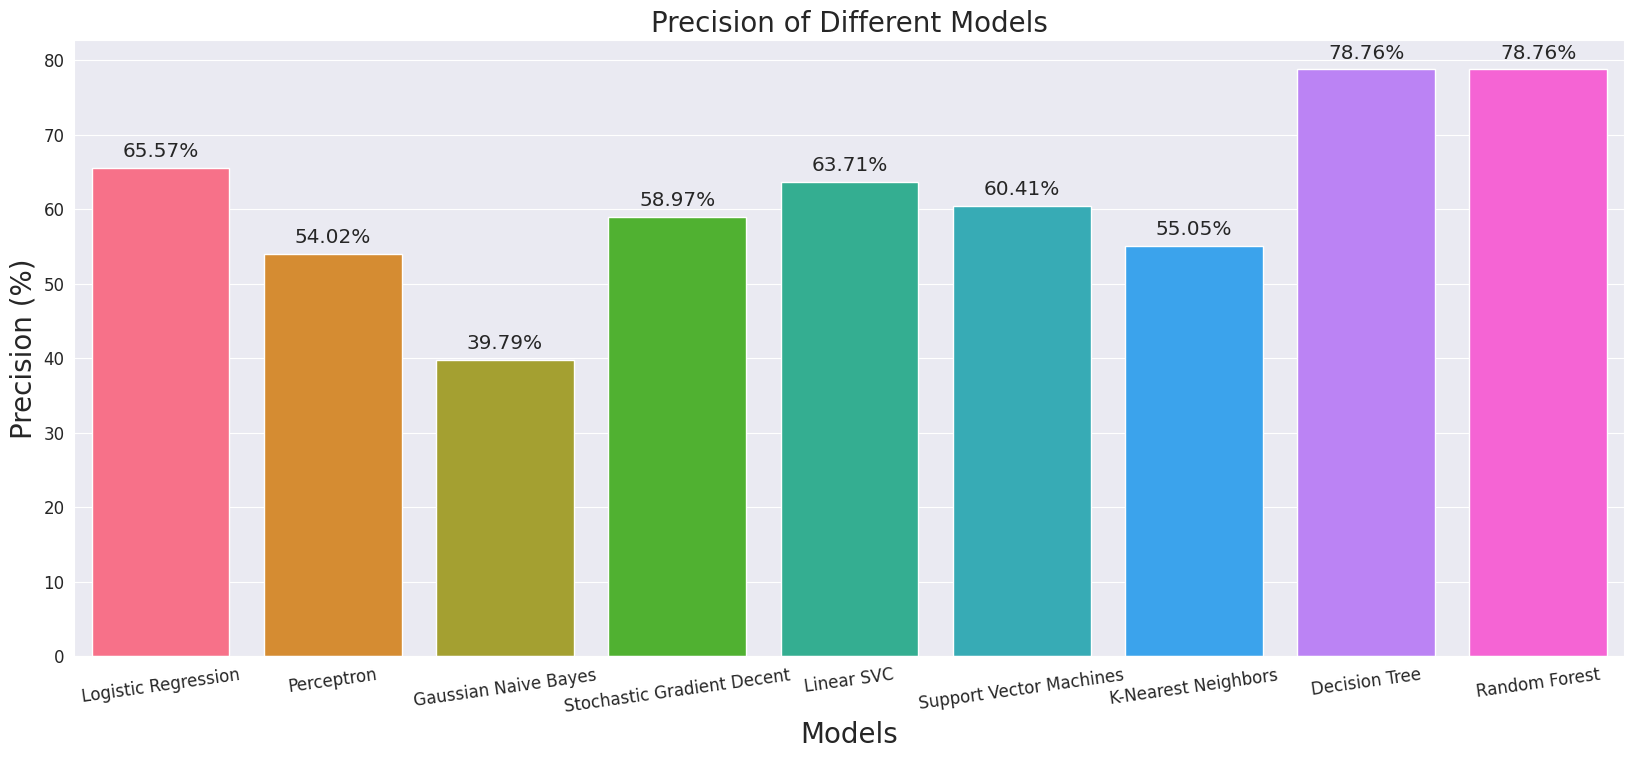

In [28]:
# Configuración del tamaño de la figura
plt.rcParams['figure.figsize'] = (20, 8) 

# Establecer el estilo del gráfico
sns.set_style('darkgrid')

# Creación del gráfico de barras
ax: plt.Axes = sns.barplot(x=model_names, y=model_scores, hue=model_names, palette="husl", saturation=2.0)

# Etiquetas y título del gráfico
plt.xlabel('Models', fontsize=20)
plt.ylabel('Precision (%)', fontsize=20)
plt.title('Precision of Different Models', fontsize=20)

# Configuración de las etiquetas de los ejes
plt.xticks(fontsize=12, horizontalalignment='center', rotation=8)
plt.yticks(fontsize=12)

# Añadir anotaciones en las barras
for bar in ax.patches:
    height: float = bar.get_height()
    ax.annotate(
        f'{height:.2f}%',
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 8),
        textcoords='offset points',
        ha='center', fontsize='x-large'
    )

# Mostrar el gráfico
plt.show()


In [29]:
# A pesar de que tanto el modelo Random Forest como el Decision Tree han dado el mismo score, decido quedarme con el Random Forest,
# ya que corrige la tendencia de overfitting que presenta el modelo de Decision Tree.
y_pred: np.ndarray = y_pred_random_forest

# Exportamos los resultados de la predicción realizada a un archivo CSV
submission = pd.DataFrame({
    "ds_index": X_test.index,
    "salary_category": y_pred
}).set_index("ds_index")
submission.to_csv('./submission.csv', sep=';')
submission

,salary_category
ds_index,
563,3
289,3
76,2
78,4
182,0
...,...
249,4
365,4
453,3


## Demo Interactiva

Para proporcionar una experiencia práctica, he desarrollado una demo interactiva que permite a los usuarios predecir el rango salarial de un científico de datos ingresando sus propios datos. Esta herramienta utiliza el modelo de machine learning RandomForestClassifier entrenado en este proyecto y ofrece predicciones basadas en los factores introducidos por el usuario.

In [30]:
# Establecemos el modelo seleccionado para predecir el salario del científico de datos
model: RandomForestClassifier = random_forest

# Mapa de niveles de experiencia
experience_level_map: dict[str, int] = {
    'EN': 0,
    'MI': 1,
    'SE': 2,
    'EX': 3
}

# Mapa de tipos de empleo
employment_type_map: dict[str, int] = {
    'PT': 0,
    'FL': 1,
    'FT': 2,
    'CT': 3
}

# Mapa de tamaños de empresa
company_size_map: dict[str, int] = {
    'S': 0,
    'M': 1,
    'L': 2
}

# Solicitar al usuario que ingrese los datos del científico de datos
work_year: int = int(input("Enter the work year of the data scientist: "))
experience_level: str = input(f"Enter the experience level of the data scientist {[item for item in experience_level_map.keys()]}: ")
employment_type: str = input(f"Enter the employment type of the data scientist {[item for item in employment_type_map.keys()]}: ")
job_title: str = input("Enter the job title of the data scientist: ")
employee_residence: str = input("Enter the country of residence of the data scientist ['US', 'CA', 'AU', 'GB', 'DE', 'IN', etc.]: ")
remote_ratio: int = int(input("Enter the remote work percentage of the data scientist [0 - 100]: "))
company_location: str = input("Enter the company location of the data scientist ['US', 'CA', 'AU', 'GB', 'DE', 'IN', etc.]: ")
company_size: str = input(f"Enter the company size of the data scientist {[item for item in company_size_map.keys()]}: ")

# Crear un diccionario con los datos del científico de datos
new_data = {
    'work_year': [ work_year - 2020 ],
    'experience_level': [ experience_level_map.get(experience_level, None) ],
    'employment_type': [ employment_type_map.get(employment_type, None) ],
    'employee_residence_' + employee_residence: [ 1 ],
    'remote_ratio': [ remote_ratio ],
    'company_location_' + company_location: [ 1 ],
    'company_size': [ company_size_map.get(company_size, None) ],
    'same_location': [ 1 if employee_residence == company_location else 0 ]
}

# Usar el vectorizer para transformar el título del trabajo del científico de datos en las características del modelo
job_title_vector: sp.sparse.csr_matrix = vectorizer.transform([job_title])
job_title_vector_names: np.ndarray = vectorizer.get_feature_names_out()[job_title_vector.indices]
job_title_columns: list[str] = ["job_title_" + name for name in job_title_vector_names]
job_title_dict: dict[str, int] = dict.fromkeys(job_title_columns, 1)

# Crear un nuevo DataFrame con los datos del científico de datos
new_data.update(job_title_dict)
new_df: pd.DataFrame = pd.DataFrame(new_data).infer_objects()
new_df: pd.DataFrame = new_df.reindex(columns=df_ds_salaries_clean.drop(columns=['salary_category']).columns, fill_value=0)

# Usar el scaler para transformar el nuevo DataFrame
new_df_scaler: np.ndarray = scaler.transform(new_df)

# Predecir el salario del científico de datos
predicted_salary: int = model.predict(new_df_scaler)[0]
predicted_salary_min: float = bins[predicted_salary]
predicted_salary_max: float = bins[predicted_salary + 1]
print(f"The estimated salary range for the data scientist goes from {predicted_salary_min} USD to {predicted_salary_max} USD")

The estimated salary range for the data scientist goes from 120000.0 USD to 160000.0 USD


## Conclusiones

Este proyecto se centra en el uso de técnicas de machine learning para estimar los rangos salariales de los científicos de datos en función de diversos factores. A lo largo del proyecto, hemos analizado y limpiado los datos, y entrenado diversos modelos de aprendizaje automático para identificar cuál se adapta mejor a nuestras necesidades predictivas.

### Resultados

Hemos entrenado y evaluado varios modelos predictivos, logrando obtener resultados satisfactorios respecto a nuestros objetivos iniciales. Entre los resultados destacamos:

- **Predicción del salario**: Los modelos entrenados lograron predecir el rango salarial de los científicos de datos con una precisión aceptable. Los modelos Random Forest y Decision Tree fueron los que obtuvieron el mejor rendimiento.
- **Factores influyentes**: A través del análisis de los datos, identificamos que el nivel de experiencia, la ubicación y el tipo de empleo son los factores más influyentes en la determinación del salario.

### Conclusión Final

El proyecto demuestra que es posible utilizar machine learning para estimar de manera efectiva los rangos salariales de los científicos de datos basándose en características específicas. Estos resultados pueden ser valiosos tanto para los aspirantes a científicos de datos como para los empleadores, proporcionándoles una comprensión más clara de los factores que afectan los salarios en este campo.